In [1]:
# Importing libraries numpy, pandas and to applay chi2-test we need the sklearn library.

import numpy as nm
import pandas as pd
from sklearn.feature_selection import chi2

In [2]:
# Upload DataFrame

df = pd.read_csv('Data\Diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# First we have to shuffle the DataFrame

df = df.sample(frac=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
613,6,105,80,28,0,32.5,0.878,26,0
86,13,106,72,54,0,36.6,0.178,45,0
111,8,155,62,26,495,34.0,0.543,46,1
621,2,92,76,20,0,24.2,1.698,28,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
474,4,114,64,0,0,28.9,0.126,24,0
329,6,105,70,32,68,30.8,0.122,37,0
729,2,92,52,0,0,30.1,0.141,22,0
662,8,167,106,46,231,37.6,0.165,43,1


In [4]:
# Convert Dataframe into numpy arrays

X = df.drop(['Outcome'], axis=1).values
y = df['Outcome'].values

In [5]:
# We applay chi2 method, o abtain chi2 values for every column from DataFrame

chi2_vals, p_vals = chi2(X, y)

In [6]:
# Print chi2 values.

chi2_vals

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [7]:
# Print p_values.

p_vals

array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
       0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041])

In [8]:
# Import from sklearn functions we need for ML.


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# Split our data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Build a model on the train data.

knn = KNeighborsClassifier()

# Now we train the model.

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Use a predict function to make predictions.

y_pred = knn.predict(X_test)

In [12]:
# Now we can chek accuracy of my model by using accuracy score to find how good model.

accuracy_score(y_pred, y_test)

0.7447916666666666

In [13]:
# Import from kydavra chi2 Selector.

from kydavra import ChiSquaredSelector

In [14]:
# Creatting our selector

chi = ChiSquaredSelector(significance_level=0.001)

In [15]:
selected_cols = chi.select(df, 'Outcome')

In [16]:
# Printing selected columns

selected_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age']

In [17]:
# Convert selected cols into numpy arrays

X_sel = df[selected_cols].values
y_sel = df['Outcome'].values

In [18]:
# Split our data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X_sel, y_sel, random_state=42)

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test)

In [21]:
# Now we can chek accuracy score for selected cols.

accuracy_score(y_pred, y_test)

0.7447916666666666

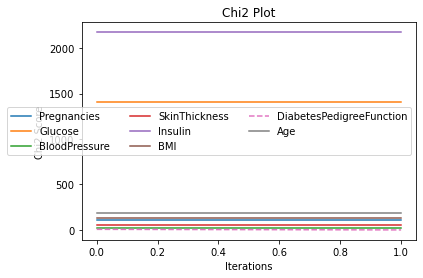

In [22]:
# We cam make ploting for ChiChiSquaredSelector. Dashed line represent the feature that have been removed from the DataFrame. 
# DiabetesPedigreeFunction has been removed because the value tends to zero.

chi.plot_chi2()

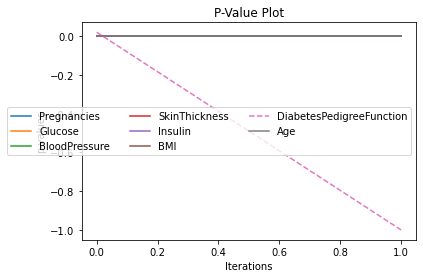

In [23]:
# Also we cam make ploting for p_value. We can see the major values for our features tend to zero.
chi.plot_p_value()